GRUPO: 
Bedón Adrián
Merlo José Miguel
Moreta Andrés
Ocaña Dennis
Ramos Xavier

In [1]:
conda install cudatoolkit

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install numba

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np #importamos numpy para utilizar linspace
import matplotlib.pyplot as plt #importamos para graficar las funciones
import numba as nb #se importa numba para aceleracion por GPU en diversas funciones
from numba import cuda #para aceleracion por GPU en diversas funciones
from numba import jit #para aceleracion por GPU en diversas funciones
from numba import njit #para aceleracion por GPU en diversas funciones

In [8]:
@njit
def f(x,r,a,b):
    """
    r: radio
    x: posicion a evaluar
    a: Coordenada X en el plano cartesiano
    b: Coordenada Y en el plano cartesiano
    """
    y = np.sqrt(r**2-x**2+2*a*x-a**2)+b #funcion para el semicirculo superior
    return y;  # evaluamos fx

@njit
def fm(x,r,a,b):
    """
    r: radio
    x: posicion a evaluar
    a: Coordenada X en el plano cartesiano
    b: Coordenada Y en el plano cartesiano
    """
    y = -(np.sqrt(r**2-x**2+2*a*x-a**2)) + b #funcion para el semicirculo inferior
    return y;  # evaluamos fx

In [9]:
# Calcularemos el área bajo la curva usando Montecarlo
# Usando el método de sampling

# Obtenemos una muestra en el intervalo (a, b)

def realizar_muestra(a, b, n=10):
    """
    a, b: intervalo
    n: tamaño de la muestra
    """
    return np.random.random(n)*(b - a) + a


def evaluar_fx_muestra(m,r,x,y):
    """
    m: muestra (array)
    evaluamos la función f definida arriba
    """
    return f(m,r,x,y)

def evaluar_fx_muestraINV(m,r,x,y):
    """
    m: muestra (array)
    evaluamos la función f definida arriba
    """
    return fm(m,r,x,y)

Area para n=1 es 0.0782244715215561
Area para n=10000 es 0.3161651190520765


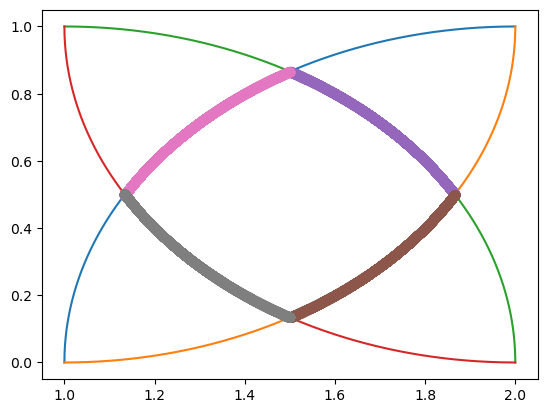

Area para n=1 es 0.5337377804290269
Area para n=10000 es 0.31335007013969246


<function matplotlib.pyplot.show(close=None, block=None)>

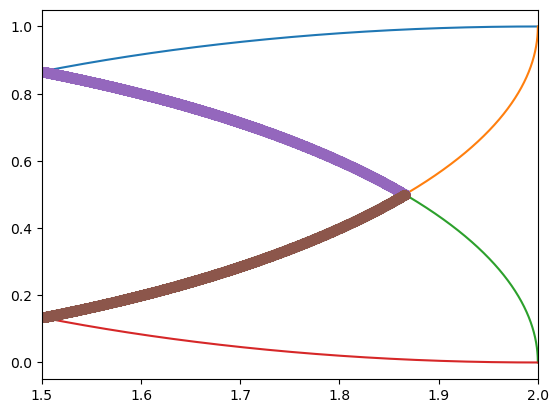

In [11]:
# Graficamos la función
ad,bd = 1.5, 1.866 #ancho parte derecha
ai,bi = 1.133, 1.5 #ancho parte izq
c = 1 #alto
cx1,cy1 = 2,0
cx2,cy2 = 1,1
cx3,cy3 = 1,0
cx4,cy4 = 2,1
r = 1


#Definimos las funciones a usar para recrear al forma
x = np.linspace(1, 2, 10000)  # Rango para la variable x
fx1 = f(x,r,cx1,cy1)  # Evaluamos f(x)
fx2 = fm(x,r,cx2,cy2)  # Evaluamos f(x)
fx3 = f(x,r,cx3,cy3)  # Evaluamos f(x)
fx4 = fm(x,r,cx4,cy4)  # Evaluamos f(x)
plt.plot(x, fx1); # Dibujamos f(x)
plt.plot(x, fx2); # Dibujamos f(x)
plt.plot(x, fx3); # Dibujamos f(x)
plt.plot(x, fx4); # Dibujamos f(x)

#Implementacion 1

t_muestras = [1, 10000]  # diferentes valores de n

for t in t_muestras:
    x_md = realizar_muestra(ad, bd, t)
    x_mi = realizar_muestra(ai, bi, t)
    f1_m = evaluar_fx_muestra(x_md,r,cx3,cy3) 
    f2_m = evaluar_fx_muestraINV(x_md,r,cx2,cy2)
    f3_m = evaluar_fx_muestra(x_mi,r,cx1,cy1) 
    f4_m = evaluar_fx_muestraINV(x_mi,r,cx4,cy4)
    areaDer = ((bd-ad)*sum(f1_m)/t) - ((bd-ad)*sum(f2_m)/t) #Calculamos area del lado derecho
    areaIzq = ((bi-ai)*sum(f3_m)/t) - ((bi-ai)*sum(f4_m)/t) #Calculamos area del lado izquierdo
    print("Area para n="+str(t), "es", areaDer + areaIzq) #sumamos las areas para desplegar el resultado
    
plt.plot(x_md, f1_m, 'o')  # Graficamos cada punto de la muestra (mi, fmi)
plt.plot(x_md, f2_m, 'o')  # Graficamos cada punto de la muestra (mi, fmi)
plt.plot(x_mi, f3_m, 'o')  # Graficamos cada punto de la muestra (mi, fmi)
plt.plot(x_mi, f4_m, 'o')  # Graficamos cada punto de la muestra (mi, fmi)
plt.show()

#Implementacion 2

for t in t_muestras:
    x_md = realizar_muestra(ad, bd, t)
    f1_m = evaluar_fx_muestra(x_md,r,cx3,cy3) 
    f2_m = evaluar_fx_muestraINV(x_md,r,cx2,cy2)
    areaDer = ((bd-ad)*sum(f1_m)/t) - ((bd-ad)*sum(f2_m)/t) #Calculamos area del lado derecho
    print("Area para n="+str(t), "es", areaDer*2) #multiplicamos el area x2 debido a que ambos lados son simetricos

plt.plot(x, fx1); # Dibujamos f(x)
plt.plot(x, fx2); # Dibujamos f(x)
plt.plot(x, fx3); # Dibujamos f(x)
plt.plot(x, fx4); # Dibujamos f(x)
plt.plot(x_md, f1_m, 'o')  # Graficamos cada punto de la muestra (mi, fmi)
plt.plot(x_md, f2_m, 'o')  # Graficamos cada punto de la muestra (mi, fmi)
plt.xlim([1.5, 2])
plt.show

0.302

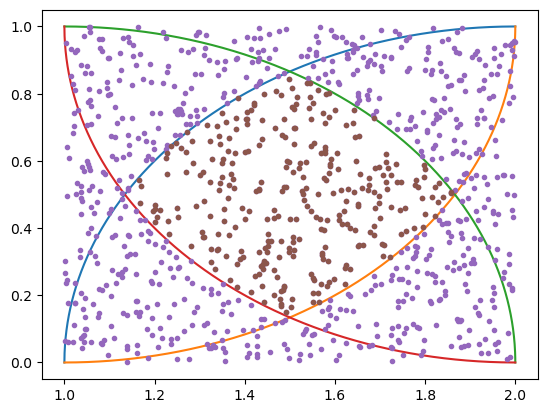

In [ ]:
# Graficamos la función
ad,bd = 1.5, 1.866 #ancho parte derecha
ai,bi = 1.133, 1.5 #ancho parte izq
c = 1 #alto
cx1,cy1 = 2,0
cx2,cy2 = 1,1
cx3,cy3 = 1,0
cx4,cy4 = 2,1
r = 1


#Definimos las funciones a usar para recrear al forma
x = np.linspace(1, 2, 10000)  # Rango para la variable x
fx1 = f(x,r,cx1,cy1)  # Evaluamos f(x)
fx2 = fm(x,r,cx2,cy2)  # Evaluamos f(x)
fx3 = f(x,r,cx3,cy3)  # Evaluamos f(x)
fx4 = fm(x,r,cx4,cy4)  # Evaluamos f(x)
plt.plot(x, fx1); # Dibujamos f(x)
plt.plot(x, fx2); # Dibujamos f(x)
plt.plot(x, fx3); # Dibujamos f(x)
plt.plot(x, fx4); # Dibujamos f(x)

#Definimos el Ancho del Tablero
a, b = 1, 2
c = 1 #Definimos el Alto del Tablero

n=1000

xi_random = np.random.random(size=n)*(b-a)+a
yi_random = np.random.random(size=n)*c

plt.plot(xi_random, yi_random, '.')

dentro = np.where((f(xi_random, r, cx1, cy1) > yi_random) & (fm(xi_random, r, cx2, cy2) < yi_random) & (f(xi_random, r, cx3, cy3) > yi_random) & (fm(xi_random, r, cx4, cy4) < yi_random))[0]
fuera = np.where((f(xi_random, r, cx1, cy1) < yi_random) & (fm(xi_random, r, cx2, cy2) > yi_random) & (f(xi_random, r, cx3, cy3) < yi_random) & (fm(xi_random, r, cx4, cy4) > yi_random))[0]

plt.plot(xi_random[dentro], yi_random[dentro], '.')

(b-a)*c*len(dentro)/n